# Milestone 1

Please put this notebook in the same folder as the training data and unzip the train.json

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t = pd.read_json('train.json')

In [3]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


### histogram with outliers

Text(0.5, 1.0, 'price')

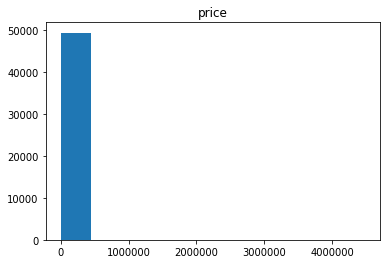

In [4]:
plt.hist(t['price'])
plt.title('price')

Text(0.5, 1.0, 'latitude')

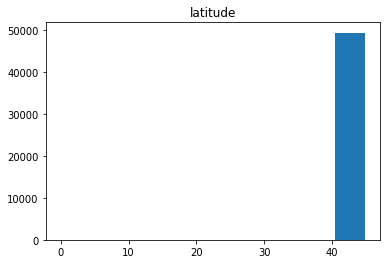

In [5]:
plt.hist(t['latitude'])
plt.title('latitude')

Text(0.5, 1.0, 'longtitude')

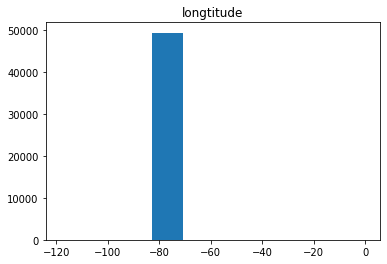

In [6]:
plt.hist(t['longitude'])
plt.title('longtitude')

### Drop heads and tails

In [7]:
price = t[t['price'] <= np.percentile(t['price'], 99)]
price = price[price['price'] >= np.percentile(t['price'],1)]

Text(0.5, 1.0, 'price')

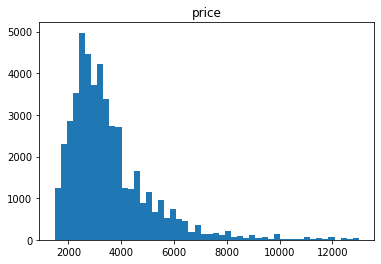

In [8]:
plt.hist(price['price'],bins=50)
plt.title('price')

In [9]:
latitude = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
latitude = latitude[latitude['latitude'] >= np.percentile(t['latitude'],1)]

Text(0.5, 1.0, 'latitude')

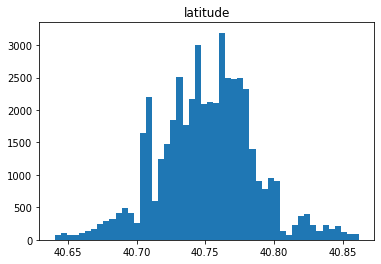

In [10]:
plt.hist(latitude['latitude'],bins = 50)
plt.title('latitude')

In [11]:
longitude = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
longitude = longitude[longitude['longitude'] >= np.percentile(t['longitude'],1)]

Text(0.5, 1.0, 'longitude')

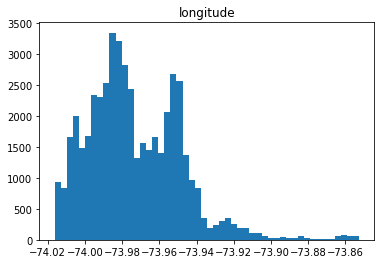

In [12]:
plt.hist(longitude['longitude'],bins = 50)
plt.title('longitude')

### plot hours

In [13]:
def date_to_month(d):

    d=pd.to_datetime(d)

    return d.hour

In [14]:
date = np.vectorize(date_to_month)

In [15]:
t['hour'] = date(t['created'])

In [16]:
group = t.groupby(t['hour'])

In [17]:
time = group['hour'].count()

Text(0.5, 1.0, 'time')

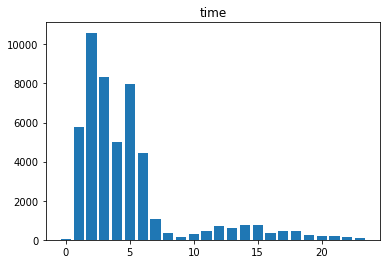

In [18]:
plt.bar(range(24),time)
plt.title('time')

In [19]:
group = t.groupby(t['interest_level'])

In [20]:
level = group['interest_level'].count()

([<matplotlib.patches.Wedge at 0x2bbc9fe9e88>,
 [Text(1.0673166378841785, 0.26614882020330893, 'high'),
  Text(-0.980513737930151, 0.49859082395311227, 'low'),
  Text(0.8307447371952902, -0.7210153823756663, 'medium')],
 [Text(0.5821727115731883, 0.1451720837472594, '7.8%'),
  Text(-0.5348256752346278, 0.27195863124715214, '69.5%'),
  Text(0.4531334930156128, -0.3932811176594543, '22.8%')])

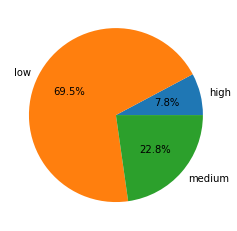

In [21]:
plt.pie(level,autopct='%1.1f%%',labels = ['high','low','medium'])

### Feature extraction

In [22]:
a = t['photos'].iloc[0]

In [23]:
a

['https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg',
 'https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg',
 'https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg',
 'https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg',
 'https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg',
 'https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg',
 'https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg',
 'https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg',
 'https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg',
 'https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg',
 'https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg',
 'https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg']

#### Example features on text data

In [24]:
from many_stop_words import get_stop_words
from wordcloud import WordCloud

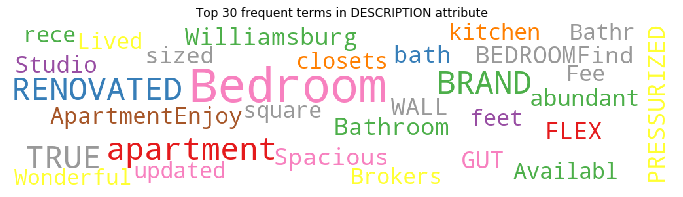

In [25]:
stop_words = get_stop_words('en')
df_spam = t['description']

wordcloud = WordCloud(
                      stopwords=stop_words,
                      background_color='white',
                      colormap='Set1_r',
                      max_words=30,
                      max_font_size=72,
                      width=1024,
                      height=256,
                      random_state=24
                     ).generate(str(df_spam))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title('Top 30 frequent terms in DESCRIPTION attribute')
plt.axis('off')
plt.show()


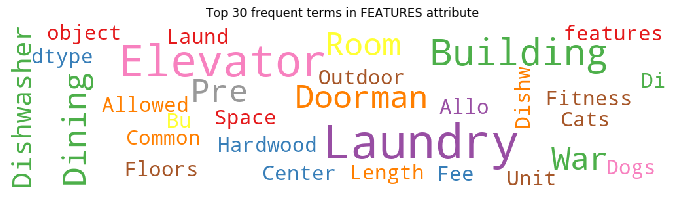

In [26]:
stop_words = get_stop_words('en')
df_spam = t['features']

wordcloud = WordCloud(
                      stopwords=stop_words,
                      background_color='white',
                      colormap='Set1_r',
                      max_words=30,
                      max_font_size=72,
                      width=1024,
                      height=256,
                      random_state=24
                     ).generate(str(df_spam))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title('Top 30 frequent terms in FEATURES attribute')
plt.axis('off')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
tf =  CountVectorizer(max_features=8000, stop_words='english',max_df=0.6)
tf_model = tf.fit(t['description'])
train_tf_matrix = tf_model.transform(t['description'])

In [30]:
print(train_tf_matrix[0])

  (0, 74)	1
  (0, 1103)	1
  (0, 1365)	1
  (0, 1637)	1
  (0, 1774)	1
  (0, 2050)	2
  (0, 2075)	1
  (0, 2084)	1
  (0, 2091)	1
  (0, 2683)	1
  (0, 2735)	1
  (0, 2863)	1
  (0, 3219)	1
  (0, 3371)	1
  (0, 3435)	1
  (0, 3700)	1
  (0, 3811)	1
  (0, 3895)	1
  (0, 4079)	1
  (0, 4190)	1
  (0, 4227)	1
  (0, 4321)	1
  (0, 4424)	1
  (0, 4458)	1
  (0, 4634)	1
  (0, 4653)	1
  (0, 4688)	1
  (0, 4924)	1
  (0, 4981)	1
  (0, 5433)	1
  (0, 5683)	1
  (0, 6024)	1
  (0, 6280)	2
  (0, 6294)	1
  (0, 6576)	1
  (0, 6905)	1
  (0, 6920)	1
  (0, 7170)	1
  (0, 7183)	1
  (0, 7321)	1
  (0, 7455)	1
  (0, 7686)	1
  (0, 7772)	1
  (0, 7842)	1


#### Example  on image histogram

In [31]:
import requests
from PIL import Image
from io import BytesIO

In [32]:
response = requests.get(a[0])
image = Image.open(BytesIO(response.content))

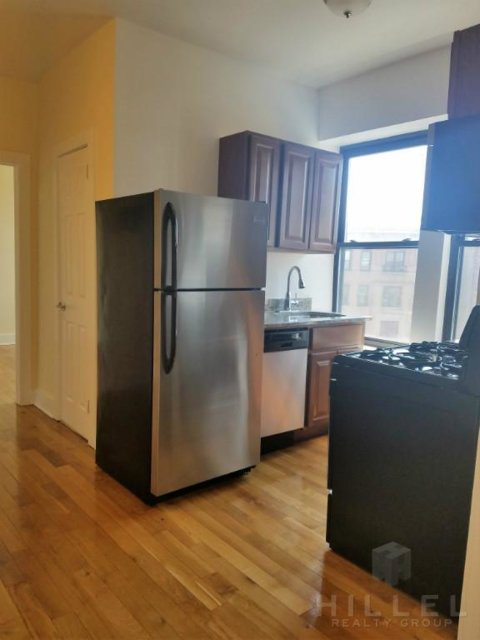

In [33]:
image

In [34]:
image.save('image.jpg')

In [35]:
import cv2

In [36]:
img = cv2.imread('image.jpg')

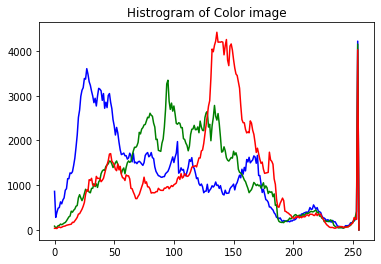

In [37]:
color = ['blue','green','red'] 
for i in [0,1,2]:
    hist = cv2.calcHist([img],[i], None, [256], [0.0,255.0])   
    plt.plot(hist, color[i])
    plt.title('Histrogram of Color image')
plt.show()